In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "aaradhanajha" # username from the json file
os.environ['KAGGLE_KEY'] = "*******************"

In [3]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 201M/207M [00:01<00:00, 144MB/s]
100% 207M/207M [00:01<00:00, 116MB/s]


In [4]:
!unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

# Import Libraries

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Clone Dataset

In [ ]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 23.77 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [6]:
import os 
main_dir = '/content/New Masks Dataset'
train_dir =os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')
train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')
test_mask_dir = os.path.join(test_dir,'Mask')
test_nomask_dir = os.path.join(test_dir,'Non Mask')
valid_mask_dir = os.path.join(valid_dir,'Mask')
valid_nomask_dir = os.path.join(valid_dir,'Non Mask')

In [ ]:
print(train_dir,train_covid_dir)

/content/datasets/Data/train /content/datasets/Data/train/COVID19


In [7]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

test_mask_names = os.listdir(test_mask_dir)
print(test_mask_names[:10])

test_nomask_names = os.listdir(test_nomask_dir)
print(test_nomask_names[:10])

['0486.jpg', '0911.jpg', '1562.jpg', '1135.jpg', '0171.jpg', '0786.jpg', '0116.png', '0022.jpg', '0367.png', '1598.jpg']
['213.jpg', '45.jpg', '17.jpg', '228.jpg', '222.jpg', '87.jpg', '100.jpg', '66.jpg', '76.jpg', '89.jpg']
['2173.png', '2083.jpg', '2135.jpg', '2245.png', '2250.png', '2070.jpg', '2072.jpg', '2086.jpg', '2159.png', '2205.png']
['real_01047.jpg', 'real_01058.jpg', 'real_01036.jpg', 'real_01040.jpg', 'real_01038.jpg', 'real_01046.jpg', 'real_01053.jpg', 'real_01049.jpg', 'real_01039.jpg', 'real_01073.jpg']


In [8]:
print("train dataset mask images :",len(train_mask_names))
print("train dataset nomask images :",len(train_nomask_names))
print("test dataset mask images :",len(test_mask_names))
print("test dataset nomask images :",len(test_nomask_names))
print("Total train images :",len(train_mask_names+train_nomask_names))
print("Total test images :",len(test_mask_names+test_nomask_names))


train dataset mask images : 300
train dataset nomask images : 300
test dataset mask images : 50
test dataset nomask images : 50
Total train images : 600
Total test images : 100


# Data Visualization

['/content/New Masks Dataset/Train/Mask/0486.jpg', '/content/New Masks Dataset/Train/Mask/0911.jpg', '/content/New Masks Dataset/Train/Mask/1562.jpg', '/content/New Masks Dataset/Train/Mask/1135.jpg', '/content/New Masks Dataset/Train/Mask/0171.jpg', '/content/New Masks Dataset/Train/Mask/0786.jpg', '/content/New Masks Dataset/Train/Mask/0116.png', '/content/New Masks Dataset/Train/Mask/0022.jpg']
['/content/New Masks Dataset/Train/Non Mask/213.jpg', '/content/New Masks Dataset/Train/Non Mask/45.jpg', '/content/New Masks Dataset/Train/Non Mask/17.jpg', '/content/New Masks Dataset/Train/Non Mask/228.jpg', '/content/New Masks Dataset/Train/Non Mask/222.jpg', '/content/New Masks Dataset/Train/Non Mask/87.jpg', '/content/New Masks Dataset/Train/Non Mask/100.jpg', '/content/New Masks Dataset/Train/Non Mask/66.jpg']


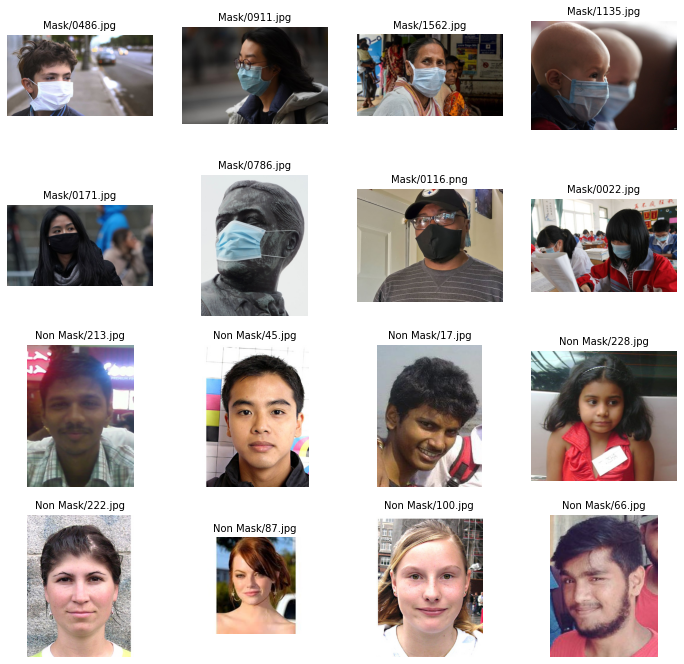

In [9]:
#lets plot a grid of 16 images (8 images of Covid19 and 8 images of Normal) 

import matplotlib.image as mpimg


plt.figure(figsize=(12,12))
#set the figure size
#fig = plt.gcf()
#fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
#covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
#normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]
covid_pic = []
for i in train_mask_names[0:8]:
  covid_pic.append(os.path.join(train_mask_dir,i))

normal_pic = []
for i in train_nomask_names[0:8]:
  normal_pic.append(os.path.join(train_nomask_dir,i))

#print the list
print(covid_pic)
print(normal_pic)

merged_pics = covid_pic+normal_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp =plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

#merge the covid and normal list



#for i , img_path in enumerate(merged_pics):
 # data = img_path.split('/',6)[6]
  #sp =plt.subplot(rows,cols,i+1)
  #sp.axis('Off')
  #img = mpimg.imread(img_path)
  #sp.set_title(data,fontsize=10)
  #plt.imshow(img,cmap='gray')
  
#plt.show()

# Generating Training , Validation & Testing Batches

In [20]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   	rotation_range=40,
                                    zoom_range=0.2,
                                   horizontal_flip = True)                               


validation_datagen = ImageDataGenerator(rescale = 1./255)


test_datagen = ImageDataGenerator(rescale = 1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir , # Set the source directory for training images
                                                    target_size = (150,150), # All images will be resized to 150x150
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(valid_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [12]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [13]:
train_generator.image_shape

(150, 150, 3)

# Build CNN Model

In [37]:
model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add another convolutional layer#]

# add another convolutional layer

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 87616)            

# Compile & Train Model

In [38]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [39]:
#train the model
history = model.fit(train_generator,
                              epochs=30,
                              validation_data = validation_generator)

Epoch 1/30
19/19 [==============================] - 15s 773ms/step - loss: 1.4846 - accuracy: 0.5783 - val_loss: 0.6923 - val_accuracy: 0.6013
Epoch 2/30
19/19 [==============================] - 14s 731ms/step - loss: 0.6583 - accuracy: 0.6517 - val_loss: 0.6480 - val_accuracy: 0.7614
Epoch 3/30
19/19 [==============================] - 14s 733ms/step - loss: 0.4936 - accuracy: 0.8167 - val_loss: 0.5223 - val_accuracy: 0.8039
Epoch 4/30
19/19 [==============================] - 14s 736ms/step - loss: 0.3976 - accuracy: 0.8567 - val_loss: 0.5422 - val_accuracy: 0.7484
Epoch 5/30
19/19 [==============================] - 14s 739ms/step - loss: 0.3841 - accuracy: 0.8583 - val_loss: 0.3465 - val_accuracy: 0.8922
Epoch 6/30
19/19 [==============================] - 14s 732ms/step - loss: 0.4025 - accuracy: 0.8517 - val_loss: 0.3930 - val_accuracy: 0.8039
Epoch 7/30
19/19 [==============================] - 14s 741ms/step - loss: 0.3125 - accuracy: 0.8850 - val_loss: 0.3934 - val_accuracy: 0.8039

In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

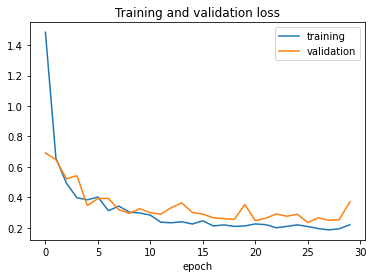

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

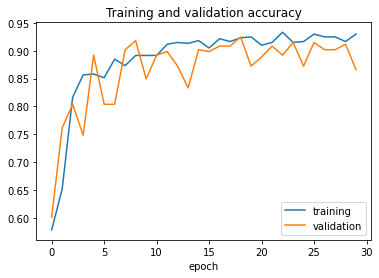

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [47]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 1s 227ms/step - loss: 0.2599 - accuracy: 0.8900
test acc :0.8899999856948853 test loss:0.2598753869533539


In [28]:
#test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for filename in uploaded.keys():
  img_path='/content/'+filename
  #print(path)
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  #images = np.vstack([x])
  prediction = model.predict(images)
  #probabilities = model.predict_proba(images)
  print(prediction)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving nomask1.jpg to nomask1.jpg
Saving nomask.jpg to nomask.jpg
Saving mask1.png to mask1.png
Saving alia.jpg to alia.jpg
[[1.]]
nomask
[[1.]]
nomask
[[0.]]
mask
[[1.]]
nomask


In [55]:
model.save('models.h5')

In [ ]:
from google.colab import files
files.download('model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
import tensorflow as tf
from tensorflow import keras
print(keras.__version__)

2.4.0


In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [31]:
y_actual =[]
y_test =[]

In [32]:


for i in os.listdir("/content/New Masks Dataset/Test/Mask"):
  img = image.load_img("/content/New Masks Dataset/Test/Mask/"+i,target_size=(150,150))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)






for i in os.listdir("/content/New Masks Dataset/Test/Non Mask"):
  img = image.load_img("/content/New Masks Dataset/Test/Non Mask/"+i,target_size=(150,150))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)
  




Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)


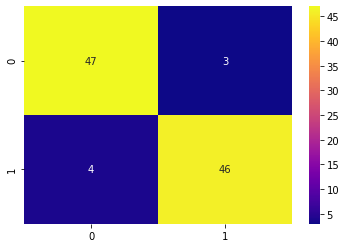

In [35]:
import seaborn as sns
sns.heatmap(cm,cmap='plasma',fmt="d",annot=True)

In [36]:
from sklearn import metrics
print(metrics.classification_report(y_actual,y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.94      0.92      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

